## Importng the packages and modules required in the project

In [1]:
!pip install textblob

In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.model_selection import learning_curve
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

C:\Users\SRAVYA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## reading the data

In [3]:
adv=pd.read_csv('fakerealnews.csv')

In [4]:
adv

,label,news
0,FAKE,You Can Smell Hillary’s Fear
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matters
...,...,...
2348,REAL,Marco Rubio: Critics of Immigration Bill Were ...
2349,REAL,Bernie Sanders win this way: Why his admirable...
2350,FAKE,'Russia has no intention of attacking anyone -...
2351,FAKE,Iceland Election: Pirate Party prepares for ma...


## value counts- Returns object containing counts of unique values.

In [5]:
adv.news.value_counts()

OnPolitics | 's politics blog                                                                     3
Michael Moore Owes Me $4.99                                                                       3
Loretta Lynch becomes first African-American woman AG.                                            2
Collusion Between Facebook and Hillary’s Campaign Revealed in Clinton Emails                      2
Obamacare Enrollees Anxiously Await Supreme Court Decision That Threatens Their Coverage          2
                                                                                                 ..
Sex and the Presidential City                                                                     1
San Bernardino massacre: A horror that affects us all                                             1
Netanyahu's Iran Speech: Why it's important for Congress to at least listen to Israel's leader    1
Obama: Warren 'Absolutely Wrong' On Trade Deal                                                    1


In [6]:
adv.label.value_counts()

FAKE    1206
REAL    1147
Name: label, dtype: int64

## Aggregate statistics

In [7]:
adv.describe()

,label,news
count,2353,2353
unique,2,2338
top,FAKE,OnPolitics | 's politics blog
freq,1206,3


In [8]:
adv.groupby('label').describe()

news                                           
      count unique                            top freq
label                                                 
FAKE   1206   1196    Michael Moore Owes Me $4.99    3
REAL   1147   1142  OnPolitics | 's politics blog    3

## Removing Null values- Cleaning the data

In [9]:
adv[adv.news.notnull()]
adv[adv.label.notnull()]

,label,news
0,FAKE,You Can Smell Hillary’s Fear
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matters
...,...,...
2348,REAL,Marco Rubio: Critics of Immigration Bill Were ...
2349,REAL,Bernie Sanders win this way: Why his admirable...
2350,FAKE,'Russia has no intention of attacking anyone -...
2351,FAKE,Iceland Election: Pirate Party prepares for ma...


In [10]:
adv=adv[pd.notnull(adv['news'])]
adv=adv[pd.notnull(adv['label'])]

In [11]:
adv.isnull()

,label,news
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2348,False,False
2349,False,False
2350,False,False
2351,False,False


## Calculating the length of news

In [12]:
adv['length']=adv['news'].map(lambda text: len(text))
adv.head(30)

,label,news,length
0,FAKE,You Can Smell Hillary’s Fear,28
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,85
2,REAL,Kerry to go to Paris in gesture of sympathy,43
3,FAKE,Bernie supporters on Twitter erupt in anger ag...,84
4,REAL,The Battle of New York: Why This Primary Matters,48
5,FAKE,"Tehran, USA",11
6,FAKE,Girl Horrified At What She Watches Boyfriend D...,73
7,REAL,‘Britain’s Schindler’ Dies at 106,33
8,REAL,Fact check: Trump and Clinton at the 'commande...,63
9,REAL,Iran reportedly makes new push for uranium con...,71


In [13]:
adv

,label,news,length
0,FAKE,You Can Smell Hillary’s Fear,28
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,85
2,REAL,Kerry to go to Paris in gesture of sympathy,43
3,FAKE,Bernie supporters on Twitter erupt in anger ag...,84
4,REAL,The Battle of New York: Why This Primary Matters,48
...,...,...,...
2348,REAL,Marco Rubio: Critics of Immigration Bill Were ...,51
2349,REAL,Bernie Sanders win this way: Why his admirable...,94
2350,FAKE,'Russia has no intention of attacking anyone -...,82
2351,FAKE,Iceland Election: Pirate Party prepares for ma...,53


## Plotting the graph according 

<AxesSubplot:ylabel='Frequency'>

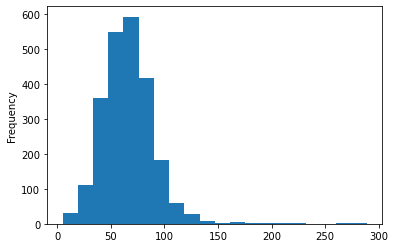

In [14]:
adv.length.plot( bins=20, kind='hist')

## Plotting the histogram according to the length of both the labels

array([<AxesSubplot:title={'center':'FAKE'}>,
       <AxesSubplot:title={'center':'REAL'}>], dtype=object)

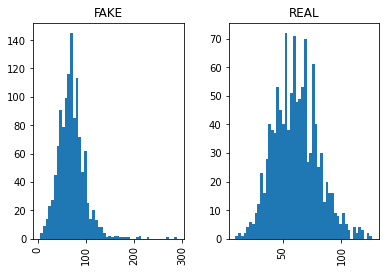

In [15]:
adv.hist(column='length', by='label', bins=50)

## Data Preprocessing

In [16]:
!python -m textblob.download_corpora

Finished.


C:\Users\SRAVYA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\SRAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SRAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SRAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SRAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users

In [17]:
def tokenize(news):
    news2 = 'news -' + str(news)  # convert bytes into proper unicode
    return TextBlob(news).words

In [18]:
adv.news.apply(tokenize)

0                  [You, Can, Smell, Hillary, ’, s, Fear]
1       [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2       [Kerry, to, go, to, Paris, in, gesture, of, sy...
3       [Bernie, supporters, on, Twitter, erupt, in, a...
4       [The, Battle, of, New, York, Why, This, Primar...
                              ...                        
2348    [Marco, Rubio, Critics, of, Immigration, Bill,...
2349    [Bernie, Sanders, win, this, way, Why, his, ad...
2350    ['Russia, has, no, intention, of, attacking, a...
2351    [Iceland, Election, Pirate, Party, prepares, f...
2352    [Egypt, bombs, Islamic, State, targets, in, Li...
Name: news, Length: 2353, dtype: object

In [19]:
def lemmatize(news):
    news2 = 'news -' + str(news).lower()
    words = TextBlob(news).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

adv.news.apply(lemmatize)

0                  [You, Can, Smell, Hillary, ’, s, Fear]
1       [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2       [Kerry, to, go, to, Paris, in, gesture, of, sy...
3       [Bernie, supporter, on, Twitter, erupt, in, an...
4       [The, Battle, of, New, York, Why, This, Primar...
                              ...                        
2348    [Marco, Rubio, Critics, of, Immigration, Bill,...
2349    [Bernie, Sanders, win, this, way, Why, his, ad...
2350    ['Russia, ha, no, intention, of, attacking, an...
2351    [Iceland, Election, Pirate, Party, prepares, f...
2352    [Egypt, bomb, Islamic, State, target, in, Liby...
Name: news, Length: 2353, dtype: object

In [20]:
TextBlob("Strong Solar Storm, Tech Risks Today").tags 

[('Strong', 'JJ'),
 ('Solar', 'NNP'),
 ('Storm', 'NNP'),
 ('Tech', 'NNP'),
 ('Risks', 'NNP'),
 ('Today', 'NNP')]

In [21]:
TextBlob("What's in that Iran bill that Obama doesn't like?").tags

[('What', 'WP'),
 ("'s", 'VBZ'),
 ('in', 'IN'),
 ('that', 'DT'),
 ('Iran', 'NNP'),
 ('bill', 'NN'),
 ('that', 'WDT'),
 ('Obama', 'NNP'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('like', 'VB')]

## Data to Vectors- fitting and transforming using Count Vectorizer 

In [22]:
bow_transformer=CountVectorizer(analyzer=lemmatize).fit(adv['news'])
len(bow_transformer.vocabulary_)

7599

In [23]:
news4=adv['news'][160]
news4

'‘Super PAC’ Gets Early Start on Pushing for a 2016 Clinton Campaign'

In [24]:
bow4 = bow_transformer.transform([news4])
bow4

<1x7599 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [25]:
bow4.shape

(1, 7599)

#### //getting feature names

In [26]:
news_bow = bow_transformer.transform(adv['news'])

'sparsity: %.2f%%' % (100.0 * news_bow.nnz / (news_bow.shape[0] * news_bow.shape[1]))

'sparsity: 0.14%'

In [27]:
'sparse matrix shape:', news_bow.shape


('sparse matrix shape:', (2353, 7599))

In [28]:
'number of non-zeros:', news_bow.nnz

('number of non-zeros:', 25610)

## Data to Vectors- fitting and transforming TFIDF- term frequency- inverse doc frequency and getting sparse matrix

In [29]:
tfidf_transformer = TfidfTransformer().fit(news_bow)
tfidf4 = tfidf_transformer.transform(bow4)
tfidf4

<1x7599 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [30]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]

6.566646710484003

In [31]:
news_tfidf = tfidf_transformer.transform(news_bow)
news_tfidf.shape

(2353, 7599)

## Applying Multinomial on the whole training set and predicting accuracy

In [32]:
%time spam_detector = MultinomialNB().fit(news_tfidf, adv['label'])

CPU times: total: 0 ns
Wall time: 13 ms


In [33]:
spam_detector=MultinomialNB().fit(news_tfidf, adv['label'])
spam_detector

MultinomialNB()

In [34]:
'predicted:', spam_detector.predict(tfidf4)[0]

('predicted:', 'REAL')

In [35]:
'expected:', adv.label[55]

('expected:', 'REAL')

In [36]:
all_predictions = spam_detector.predict(news_tfidf)
all_predictions

array(['FAKE', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [37]:
'accuracy', accuracy_score(adv['label'], all_predictions)


('accuracy', 0.9371015724606885)

In [38]:
'confusion matrix\n', confusion_matrix(adv['label'], all_predictions)


('confusion matrix\n',
 array([[1124,   82],
        [  66, 1081]], dtype=int64))

In [39]:
'(row=expected, col=predicted)'

'(row=expected, col=predicted)'

Text(0.5, 0, 'predicted label')

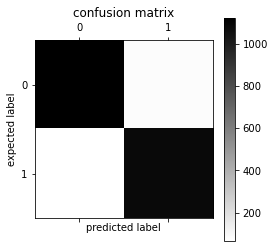

In [40]:

plt.matshow(confusion_matrix(adv['label'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [41]:
print (classification_report(adv['label'], all_predictions))

              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.94      1206
        REAL       0.93      0.94      0.94      1147

    accuracy                           0.94      2353
   macro avg       0.94      0.94      0.94      2353
weighted avg       0.94      0.94      0.94      2353



## For Logistic Regression

In [42]:
%time spam_detector = LogisticRegression().fit(news_tfidf, adv['label'])

CPU times: total: 62.5 ms
Wall time: 71.7 ms


In [43]:
spam_detector=LogisticRegression().fit(news_tfidf, adv['label'])
spam_detector

LogisticRegression()

In [44]:
print('predicted:', spam_detector.predict(tfidf4)[0])
print('expected:', adv.label[6])

predicted: REAL
expected: FAKE


In [45]:
all_predictions = spam_detector.predict(news_tfidf)
all_predictions

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'FAKE', 'REAL'], dtype=object)

In [46]:
print('accuracy', accuracy_score(adv['label'], all_predictions))
print('confusion matrix\n', confusion_matrix(adv['label'], all_predictions))
print('(row=expected, col=predicted)')


accuracy 0.9464513387165321
confusion matrix
 [[1164   42]
 [  84 1063]]
(row=expected, col=predicted)


Text(0.5, 0, 'predicted label')

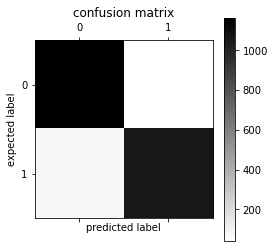

In [47]:

plt.matshow(confusion_matrix(adv['label'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [48]:
print (classification_report(adv['label'], all_predictions))

              precision    recall  f1-score   support

        FAKE       0.93      0.97      0.95      1206
        REAL       0.96      0.93      0.94      1147

    accuracy                           0.95      2353
   macro avg       0.95      0.95      0.95      2353
weighted avg       0.95      0.95      0.95      2353



## Calculating how much data we are training and testing

In [49]:
msg_train, msg_test, label_train, label_test = train_test_split(adv['news'], adv['label'], test_size=0.2)

len(msg_train), len(msg_test), len(msg_train) + len(msg_test)

(1882, 471, 2353)

#### Resulted in 5% of testing data and rest is the training data

## PIPELINE- to combine techniques


In [50]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='char')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),# train on TF-IDF vectors w/ Naive Bayes classifie
])

In [51]:
import _pickle as cPickle

## Cross Validation Scores for Logistic Regression

In [52]:
scores = cross_val_score(pipeline,  # convert news into models
                         msg_train,  # training data
                         label_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

In [53]:
scores

array([0.68783069, 0.64550265, 0.62765957, 0.61702128, 0.67021277,
       0.62234043, 0.64361702, 0.69148936, 0.68617021, 0.63297872])

In [54]:
scores.mean(), scores.std()

(0.652482269503546, 0.02740472039335531)

## Cross Validation scores for Naive Bayes

In [55]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='char')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),# train on TF-IDF vectors w/ Naive Bayes classifie
])

In [56]:
scores = cross_val_score(pipeline,  # convert news into models
                         msg_train,  # training data
                         label_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
print(scores)


[0.67724868 0.68253968 0.65425532 0.59042553 0.63829787 0.63297872
 0.65957447 0.70744681 0.64893617 0.61702128]


In [57]:
scores.mean(), scores.std()

(0.6508724530001126, 0.03204392676462356)

In [58]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Data")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

CPU times: total: 78.1 ms
Wall time: 375 ms


<module 'matplotlib.pyplot' from 'C:\\Users\\SRAVYA\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

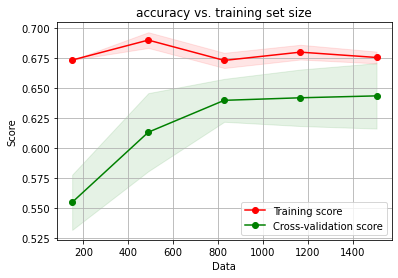

In [59]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", msg_train, label_train, cv=5)

## GridSearch for SVM

In [60]:
label_train_bin = [0 if i=='FAKE' else 1 for i in label_train]

In [61]:
pipeline_svm = Pipeline([
    ('bow', CountVectorizer(analyzer='char')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC()),  # <== change here
])

# pipeline parameters to automatically explore and tune
param_svm = [
  {'classifier__C': [1], 'classifier__kernel': ['linear']},
  {'classifier__C': [1], 'classifier__gamma': [0.001, 0.0001], 'classifier__kernel': ['rbf']},
]

grid_svm = GridSearchCV(
    pipeline_svm,  # pipeline from above
    param_grid=param_svm,  # parameters to tune via cross validation
    refit=True,  # fit using all data, on the best detected classifier
    n_jobs=-1,  # number of cores to use for parallelization; -1 for "all cores"
    scoring='accuracy',  # what score are we optimizing?
    cv=StratifiedKFold(),  # what type of cross validation to use
)

## SVM time ad Scores

In [62]:
%time svm_detector = grid_svm.fit(msg_train, label_train)
svm_detector.cv_results_.keys()

CPU times: total: 453 ms
Wall time: 1.45 s


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_classifier__C', 'param_classifier__kernel', 'param_classifier__gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [63]:
print(confusion_matrix(label_test, svm_detector.predict(msg_test)))
print(classification_report(label_test, svm_detector.predict(msg_test)))

[[165  80]
 [ 91 135]]
              precision    recall  f1-score   support

        FAKE       0.64      0.67      0.66       245
        REAL       0.63      0.60      0.61       226

    accuracy                           0.64       471
   macro avg       0.64      0.64      0.64       471
weighted avg       0.64      0.64      0.64       471



In [64]:
svm_detector.predict(["Donald Trump just trolled Rosie O'Donnell. Not good"])[0]

'REAL'

In [65]:
svm_detector.predict(["Kushner family won't attend China investor pitch after criticism."])[0]

'REAL'

In [66]:
svm_detector.predict(["US prosecuter told to push for more harsher punishments"])[0]

'REAL'

In [67]:
clf=svm.SVC(kernel='linear', C=1.0,gamma=1)


## Count Vectorizer and TRAINING AND TESTING DATA

In [68]:
vect=CountVectorizer()

In [69]:
new_df1=adv[['news']]
new_df2=adv[['label']]

In [70]:
train_data=new_df1.iloc[1:500,:]
test_data=new_df2.iloc[500:1,:]
train_label=new_df1.iloc[1:500,:]
test_label=new_df2.iloc[500:1,:]


In [71]:
X=adv.news
y=adv.label

In [72]:
print(X.shape)
print(y.shape)

(2353,)
(2353,)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=4)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1764,)
(589,)
(1764,)
(589,)


In [75]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [76]:
X_train_dtm=vect.fit_transform(X_train)

In [77]:
X_train_dtm

<1764x5028 sparse matrix of type '<class 'numpy.int64'>'
	with 17866 stored elements in Compressed Sparse Row format>

In [78]:
X_test_dtm=vect.transform(X_test)
X_test_dtm

<589x5028 sparse matrix of type '<class 'numpy.int64'>'
	with 5077 stored elements in Compressed Sparse Row format>

## Applying MACHINE LEARNING ALGORITHM ON TRAINING AND TESTING DATA

# 1. KNN

In [79]:
knn= KNeighborsClassifier(n_neighbors=8)

In [80]:
knn.fit(X_train_dtm, y_train)

KNeighborsClassifier(n_neighbors=8)

In [81]:
y_pred_class=knn.predict(X_test_dtm)

In [82]:
knn.score(X_test_dtm, y_test)

0.5280135823429541

In [83]:
%time knn.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 4.82 ms


KNeighborsClassifier(n_neighbors=8)

In [84]:
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
import sys
import scipy

In [85]:
metrics.accuracy_score(y_test,y_pred_class)

0.5280135823429541

In [86]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[275,  19],
       [259,  36]], dtype=int64)

In [87]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

        FAKE       0.51      0.94      0.66       294
        REAL       0.65      0.12      0.21       295

    accuracy                           0.53       589
   macro avg       0.58      0.53      0.43       589
weighted avg       0.58      0.53      0.43       589



In [88]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=15),  # steps to convert raw emails into models
                         X_train_dtm,  # training data
                         y_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

In [89]:
scores

array([0.52542373, 0.5819209 , 0.61016949, 0.52542373, 0.5625    ,
       0.59090909, 0.5625    , 0.52272727, 0.60795455, 0.55681818])

In [90]:
scores.mean()

0.5646346944016434

In [91]:
scores.std()

0.0313697745327143

# 2.NAIVE BAYES

In [92]:
nb=MultinomialNB()

In [93]:
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 7.62 ms


MultinomialNB()

In [94]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [95]:
y_pred_class=nb.predict(X_test_dtm)

In [96]:
nb.score(X_train_dtm, y_train)

0.963718820861678

In [97]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[228,  66],
       [ 59, 236]], dtype=int64)

In [98]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
y_pred_prob

array([5.30661276e-01, 5.83414107e-01, 8.22570060e-01, 9.70186064e-01,
       3.59249383e-02, 5.18869517e-01, 5.53179598e-01, 5.93976457e-01,
       2.67883925e-01, 3.47280432e-01, 9.92927398e-01, 3.23184615e-01,
       4.40246680e-01, 4.20292400e-03, 5.62988124e-01, 9.01482203e-01,
       6.83953241e-01, 6.93996020e-03, 6.34716930e-01, 9.50859284e-01,
       9.86861821e-01, 6.30965930e-01, 4.28940674e-01, 9.47988801e-01,
       9.82676718e-01, 7.84987733e-01, 9.67521370e-01, 3.66603658e-01,
       9.62299442e-01, 9.91911962e-01, 1.82276391e-02, 9.99964020e-01,
       5.78966967e-03, 9.04514832e-01, 9.85438713e-01, 3.76903048e-01,
       3.53227881e-01, 7.82499439e-01, 8.13106698e-01, 8.30024627e-01,
       9.27175768e-01, 3.24329261e-01, 8.01869555e-01, 9.35871270e-01,
       9.18780291e-01, 8.93069902e-01, 8.27098176e-04, 3.56322876e-01,
       9.95548621e-01, 9.75204867e-01, 4.28512949e-01, 1.84460944e-02,
       6.70954445e-02, 1.95554229e-02, 3.15020499e-01, 3.94149369e-03,
      

In [99]:
metrics.accuracy_score(y_test, y_pred_class)

0.7877758913412564

In [100]:
print(metrics.classification_report(y_pred_class, y_test))

              precision    recall  f1-score   support

        FAKE       0.78      0.79      0.78       287
        REAL       0.80      0.78      0.79       302

    accuracy                           0.79       589
   macro avg       0.79      0.79      0.79       589
weighted avg       0.79      0.79      0.79       589



In [101]:
scores = cross_val_score(MultinomialNB(),  # steps to convert raw emails into models
                         X_train_dtm,  # training data
                         y_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

In [102]:
scores

array([0.78531073, 0.77966102, 0.77966102, 0.7740113 , 0.76704545,
       0.75      , 0.71590909, 0.77272727, 0.82386364, 0.72727273])

In [103]:
scores.mean()

0.7675462249614793

In [104]:
scores.std()

0.02906178667808822

# Logsitic Regression

In [105]:
logreg=LogisticRegression()

In [106]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression()

In [107]:
y_pred_class=logreg.predict(X_test_dtm)


In [108]:
logreg.score(X_test_dtm, y_test)



0.7877758913412564

In [109]:
%time logreg.fit(X_train_dtm, y_train)


CPU times: total: 93.8 ms
Wall time: 45.2 ms


LogisticRegression()

In [110]:
metrics.accuracy_score(y_test,y_pred_class)



0.7877758913412564

In [111]:
metrics.confusion_matrix(y_test, y_pred_class)


array([[245,  49],
       [ 76, 219]], dtype=int64)

In [112]:
print(metrics.classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

        FAKE       0.76      0.83      0.80       294
        REAL       0.82      0.74      0.78       295

    accuracy                           0.79       589
   macro avg       0.79      0.79      0.79       589
weighted avg       0.79      0.79      0.79       589



In [113]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=15),  # steps to convert raw emails into models
                         X_train_dtm,  # training data
                         y_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

In [114]:
scores

array([0.52542373, 0.5819209 , 0.61016949, 0.52542373, 0.5625    ,
       0.59090909, 0.5625    , 0.52272727, 0.60795455, 0.55681818])

In [115]:
scores.mean()

0.5646346944016434

In [116]:
scores.std()

0.0313697745327143

In [117]:
names=['label','news','length']


In [118]:
seed=7

In [119]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))

In [120]:
results=[]


In [121]:
names=[]

In [122]:
scoring='accuracy'

In [123]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    scores = cross_val_score(model, X_test_dtm, y_pred_class, cv=kfold, scoring=scoring)
    results.append(scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)


LR: 0.799620 (0.037969)
KNN: 0.587493 (0.052099)
NB: 0.784337 (0.034227)
SVM: 0.760608 (0.051102)


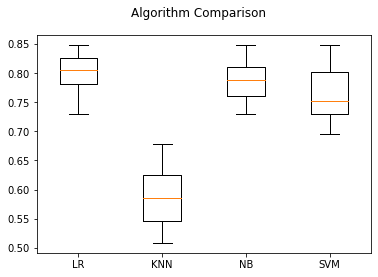

In [124]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

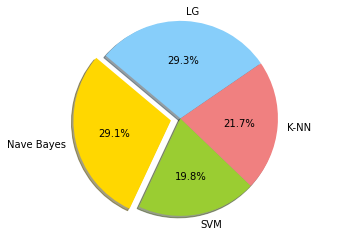

In [125]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Nave Bayes', 'SVM', 'K-NN', 'LG'
sizes = [80.14, 54.50, 59.77, 80.64]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

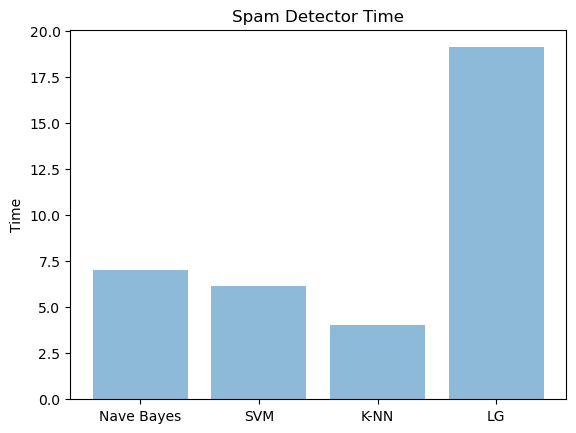

In [126]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Nave Bayes', 'SVM', 'K-NN', 'LG')
y_pos = np.arange(len(objects))
performance = [7.02,6.13,4.01,19.1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.title('Spam Detector Time')
 
plt.show()

In [127]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [128]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [129]:
# importing neural network libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D

In [130]:
train = pd.read_csv('fakerealnews.csv') 
test = pd.read_csv('fakerealnews.csv')
train_data = train.copy()
test_data = test.copy()

In [131]:
import pandas as pd

# Assuming train_data is your DataFrame
print(train_data.columns)


Index(['label', 'news'], dtype='object')


In [132]:
print(train_data.shape)
train_data.head()

(2353, 2)


,label,news
0,FAKE,You Can Smell Hillary’s Fear
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matters


In [133]:
print(test_data.shape)
test_data.head()

(2353, 2)


,label,news
0,FAKE,You Can Smell Hillary’s Fear
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matters


In [134]:
# checking for missing values
train_data.isnull().sum()

label    0
news     0
dtype: int64

In [135]:
# dropping missing values from text columns alone. 
train_data[['label', 'news']] = train_data[['label', 'news']].fillna(value = 'Missing')
train_data = train_data.dropna()
train_data.isnull().sum()

label    0
news     0
dtype: int64

In [136]:
length = []
[length.append(len(str(text))) for text in train_data['news']]
train_data['length'] = length
train_data.head()

,label,news,length
0,FAKE,You Can Smell Hillary’s Fear,28
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,85
2,REAL,Kerry to go to Paris in gesture of sympathy,43
3,FAKE,Bernie supporters on Twitter erupt in anger ag...,84
4,REAL,The Battle of New York: Why This Primary Matters,48


In [137]:
min(train_data['length']), max(train_data['length']), round(sum(train_data['length'])/len(train_data['length']))

(5, 289, 66)

In [138]:
len(train_data[train_data['length'] < 50])

578

In [139]:
train_data['news'][train_data['length'] < 50]

0                           You Can Smell Hillary’s Fear
2            Kerry to go to Paris in gesture of sympathy
4       The Battle of New York: Why This Primary Matters
5                                            Tehran, USA
7                      ‘Britain’s Schindler’ Dies at 106
                              ...                       
2335       Why NATO is put on war footing against Russia
2336      Top five donors to Clinton campaign are Jewish
2337                             The worst election ever
2339                   The House GOP budget is a gimmick
2344               Backstory: Behind the terror takedown
Name: news, Length: 578, dtype: object

In [140]:
# dropping the outliers
train_data = train_data.drop(train_data['news'][train_data['length'] < 50].index, axis = 0)

In [141]:
min(train_data['length']), max(train_data['length']), round(sum(train_data['length'])/len(train_data['length']))

(50, 289, 75)

In [142]:
max_features = 4500

In [143]:
# Tokenizing the text - converting the words, letters into counts or numbers. 
# We dont need to explicitly remove the punctuations. we have an inbuilt option in Tokenizer for this purpose
tokenizer = Tokenizer(num_words = max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = train_data['news'])
X = tokenizer.texts_to_sequences(texts = train_data['news'])

In [144]:
# now applying padding to make them even shaped.
X = pad_sequences(sequences = X, maxlen = max_features, padding = 'pre')

In [145]:
print(X.shape)
y = train_data['label'].values
print(y.shape)

(1775, 4500)
(1775,)


In [146]:
# splitting the data training data for training and validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [147]:
import tensorflow as tf

# Suppress TensorFlow deprecation warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)



In [148]:
# LSTM Neural Network
lstm_model = Sequential(name = 'lstm_nn_model')
lstm_model.add(layer = Embedding(input_dim = max_features, output_dim = 120, name = '1st_layer'))
lstm_model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
lstm_model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm_model.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))
# compiling the model
lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [149]:
# LSTM Neural Network
lstm_model = Sequential(name='lstm_nn_model')
lstm_model.add(Embedding(input_dim=max_features, output_dim=120, name='1st_layer'))
lstm_model.add(LSTM(units=120, dropout=0.2, recurrent_dropout=0.2, name='2nd_layer'))
lstm_model.add(Dropout(rate=0.5, name='3rd_layer'))
lstm_model.add(Dense(units=120, activation='relu', name='4th_layer'))
lstm_model.add(Dropout(rate=0.5, name='5th_layer'))
lstm_model.add(Dense(units=len(set(y)), activation='sigmoid', name='output_layer'))

# Compiling the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define hyperparameters
vocab_size = 10000  # Define based on your data
embedding_dim = 100  # Define based on your data
maxlen = 100  # Define based on your data
num_units = 64  # Number of units in the LSTM layer
num_classes = 2  # Number of output classes

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(units=num_units))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 1042370 (3.98 MB)
Trainable params: 1042370 (3.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [151]:
import tensorflow as tf
tf.keras.backend.clear_session()  # Resets the default graph


In [152]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Enable eager execution


In [153]:
pip install tensorflow numpy matplotlib


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wrapt<1.15,>=1.11.0 in c:\users\sravya\anaconda3\lib\site-packages (from tensorflow-intel==2.15.0->tensorflow) (1.12.1)



In [154]:
import tensorflow as tf

# Enable eager execution of tf.data functions
tf.data.experimental.enable_debug_mode()


In [155]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure uniform length
maxlen = 100  # Define the maximum length of sequences
X_train_padded = pad_sequences(X_train, padding='post', maxlen=maxlen)

# Now, the shape of X_train_padded will be (num_samples, maxlen)
# Ensure that your input data X_train_padded has the correct shape before training the model


In [156]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [157]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [158]:
pip install scikit-learn


  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\SRAVYA\\AppData\\Local\\Temp\\pip-uninstall-jdgohk8t\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [159]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow messages

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate some random data for demonstration
data = np.random.rand(100, 10, 1)  # 100 samples, sequence length 10, 1 feature

# Define the LSTM model
model = Sequential([
    LSTM(50, input_shape=(10, 1)),  # 50 units in the LSTM layer
    Dense(1)  # Output layer with 1 unit
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(data, np.random.rand(100, 1), epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(data)


Epoch 1/10
4/4 [==============================] - 1s 67ms/step - loss: 0.4146
Epoch 2/10
4/4 [==============================] - 0s 65ms/step - loss: 0.3015
Epoch 3/10
4/4 [==============================] - 0s 64ms/step - loss: 0.2144
Epoch 4/10
4/4 [==============================] - 0s 78ms/step - loss: 0.1469
Epoch 5/10
4/4 [==============================] - 0s 73ms/step - loss: 0.0996
Epoch 6/10
4/4 [==============================] - 0s 77ms/step - loss: 0.0872
Epoch 7/10
4/4 [==============================] - 0s 69ms/step - loss: 0.1003
Epoch 8/10
4/4 [==============================] - 0s 94ms/step - loss: 0.0980
Epoch 9/10
4/4 [==============================] - 0s 74ms/step - loss: 0.0882
Epoch 10/10
4/4 [==============================] - 0s 26ms/step


In [160]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate a sample dataset X and target variable y
X = np.random.rand(1000, 10)  # Assuming 1000 samples with 10 features
y = np.random.randint(0, 2, size=(1000,))  # Assuming binary classification

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define and train the LSTM model
model = Sequential([
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=20, batch_size=64)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_reshaped, y_test)

# Print the LSTM accuracy
print("LSTM Test Accuracy:", accuracy)


Epoch 1/20
10/10 [==============================] - 1s 96ms/step - loss: 0.6924 - accuracy: 0.5047 - val_loss: 0.6944 - val_accuracy: 0.4875
Epoch 2/20
10/10 [==============================] - 1s 91ms/step - loss: 0.6885 - accuracy: 0.5516 - val_loss: 0.6940 - val_accuracy: 0.5312
Epoch 3/20
10/10 [==============================] - 1s 93ms/step - loss: 0.6868 - accuracy: 0.5406 - val_loss: 0.6941 - val_accuracy: 0.5063
Epoch 4/20
10/10 [==============================] - 1s 77ms/step - loss: 0.6865 - accuracy: 0.5547 - val_loss: 0.6945 - val_accuracy: 0.5063
Epoch 5/20
10/10 [==============================] - 1s 83ms/step - loss: 0.6834 - accuracy: 0.5484 - val_loss: 0.6966 - val_accuracy: 0.5063
Epoch 6/20
10/10 [==============================] - 1s 69ms/step - loss: 0.6837 - accuracy: 0.5500 - val_loss: 0.6969 - val_accuracy: 0.5125
Epoch 7/20
10/10 [==============================] - 1s 92ms/step - loss: 0.6850 - accuracy: 0.5406 - val_loss: 0.6972 - val_accuracy: 0.5125
Epoch 8/20
10

In [161]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming X_train and X_test are your sequences with a length of 10
X_train_padded = pad_sequences(X_train, maxlen=50)
X_test_padded = pad_sequences(X_test, maxlen=50)


In [162]:
# Define and train the LSTM model
model = Sequential([
    Embedding(input_dim=1000, output_dim=100, input_length=50),
    SpatialDropout1D(0.2),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
y_pred_prob = model.predict(X_test_padded)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("LSTM Accuracy:", accuracy)


Epoch 1/10
20/20 [==============================] - 17s 824ms/step - loss: 0.6944 - accuracy: 0.4953 - val_loss: 0.6952 - val_accuracy: 0.4437
Epoch 2/10
20/20 [==============================] - 14s 683ms/step - loss: 0.6937 - accuracy: 0.5094 - val_loss: 0.6952 - val_accuracy: 0.4437
Epoch 3/10
20/20 [==============================] - 14s 683ms/step - loss: 0.6927 - accuracy: 0.5078 - val_loss: 0.6937 - val_accuracy: 0.4437
Epoch 4/10
20/20 [==============================] - 13s 653ms/step - loss: 0.6933 - accuracy: 0.4922 - val_loss: 0.6948 - val_accuracy: 0.4437
Epoch 5/10
20/20 [==============================] - 13s 634ms/step - loss: 0.6934 - accuracy: 0.4922 - val_loss: 0.6950 - val_accuracy: 0.4437
Epoch 6/10
20/20 [==============================] - 14s 713ms/step - loss: 0.6955 - accuracy: 0.4828 - val_loss: 0.6956 - val_accuracy: 0.4437
Epoch 7/10
20/20 [==============================] - 13s 672ms/step - loss: 0.6945 - accuracy: 0.5016 - val_loss: 0.6979 - val_accuracy: 0.4437

In [163]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming you have your training and testing data: X_train, y_train, X_test, y_test

# Ensure that the input data has the correct shape for LSTM
# Reshape X_train and X_test if necessary
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("LSTM Test Accuracy:", accuracy)


Epoch 1/10
10/10 [==============================] - 2s 166ms/step - loss: 0.6954 - accuracy: 0.4922 - val_loss: 0.6987 - val_accuracy: 0.4437
Epoch 2/10
10/10 [==============================] - 2s 161ms/step - loss: 0.6941 - accuracy: 0.4641 - val_loss: 0.6932 - val_accuracy: 0.4875
Epoch 3/10
10/10 [==============================] - 1s 150ms/step - loss: 0.6937 - accuracy: 0.4688 - val_loss: 0.6943 - val_accuracy: 0.4437
Epoch 4/10
10/10 [==============================] - 1s 148ms/step - loss: 0.6943 - accuracy: 0.4641 - val_loss: 0.6933 - val_accuracy: 0.4625
Epoch 5/10
10/10 [==============================] - 1s 149ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6966 - val_accuracy: 0.4437
Epoch 6/10
10/10 [==============================] - 2s 166ms/step - loss: 0.6934 - accuracy: 0.5094 - val_loss: 0.6963 - val_accuracy: 0.4437
Epoch 7/10
10/10 [==============================] - 1s 147ms/step - loss: 0.6927 - accuracy: 0.5094 - val_loss: 0.6969 - val_accuracy: 0.4437
Epoch 

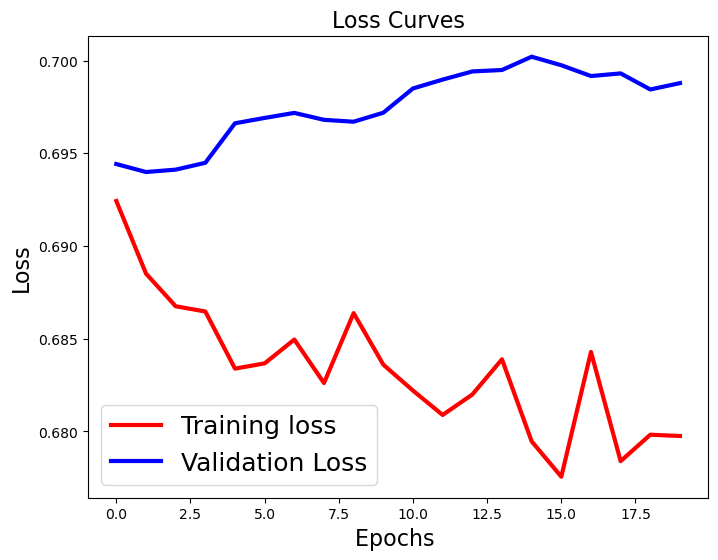

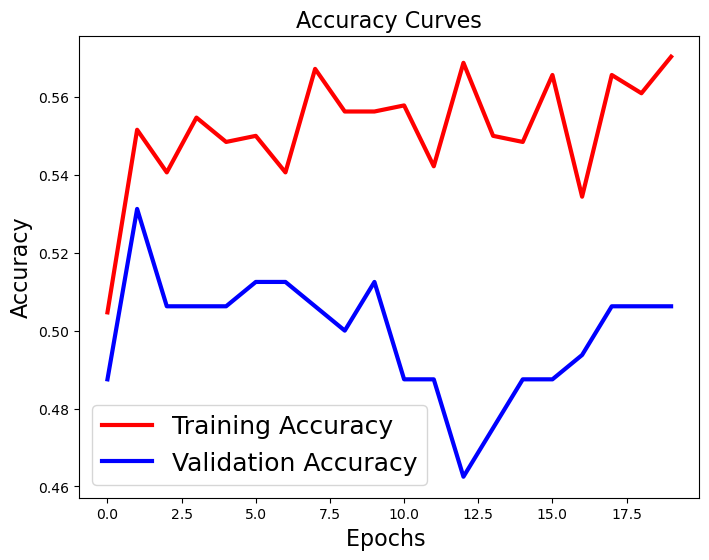

In [164]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

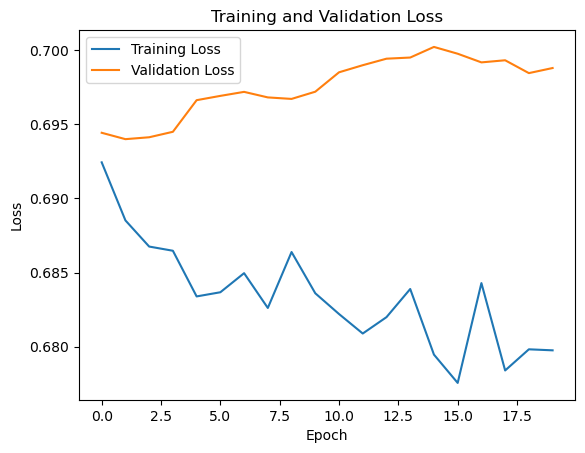

In [165]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history of the LSTM model

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense

max_features = 10000  # Example value, replace it with the actual number of unique words in your dataset

# Define the GRU model
gru_model = Sequential(name='gru_nn_model')
gru_model.add(Embedding(input_dim=max_features, output_dim=120, name='1st_layer'))
gru_model.add(GRU(units=120, dropout=0.2, recurrent_dropout=0.2, recurrent_activation='relu', activation='relu', name='2nd_layer'))
gru_model.add(Dropout(rate=0.4, name='3rd_layer'))
gru_model.add(Dense(units=120, activation='relu', name='4th_layer'))
gru_model.add(Dropout(rate=0.2, name='5th_layer'))
gru_model.add(Dense(units=len(set(y)), activation='softmax', name='output_layer'))

# Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [167]:
gru_model.summary()

Model: "gru_nn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer (Embedding)       (None, None, 120)         1200000   
                                                                 
 2nd_layer (GRU)             (None, 120)               87120     
                                                                 
 3rd_layer (Dropout)         (None, 120)               0         
                                                                 
 4th_layer (Dense)           (None, 120)               14520     
                                                                 
 5th_layer (Dropout)         (None, 120)               0         
                                                                 
 output_layer (Dense)        (None, 2)                 242       
                                                                 
Total params: 1301882 (4.97 MB)
Trainable params: 1301

Epoch 1/10
20/20 [==============================] - 17s 846ms/step - loss: 0.6934 - accuracy: 0.5109 - val_loss: 0.6937 - val_accuracy: 0.5063
Epoch 2/10
20/20 [==============================] - 17s 859ms/step - loss: 0.6778 - accuracy: 0.6578 - val_loss: 0.6936 - val_accuracy: 0.5500
Epoch 3/10
20/20 [==============================] - 17s 867ms/step - loss: 0.6215 - accuracy: 0.8156 - val_loss: 0.6966 - val_accuracy: 0.5437
Epoch 4/10
20/20 [==============================] - 17s 870ms/step - loss: 0.4342 - accuracy: 0.8469 - val_loss: 0.8120 - val_accuracy: 0.5688
Epoch 5/10
20/20 [==============================] - 18s 889ms/step - loss: 0.2560 - accuracy: 0.9219 - val_loss: 1.0102 - val_accuracy: 0.5813
Epoch 6/10
20/20 [==============================] - 17s 872ms/step - loss: 0.1440 - accuracy: 0.9641 - val_loss: 1.2656 - val_accuracy: 0.5813
Epoch 7/10
20/20 [==============================] - 17s 876ms/step - loss: 0.0873 - accuracy: 0.9844 - val_loss: 1.4360 - val_accuracy: 0.5437

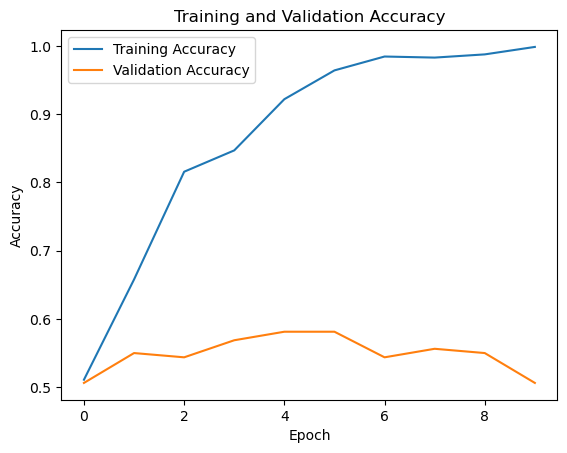

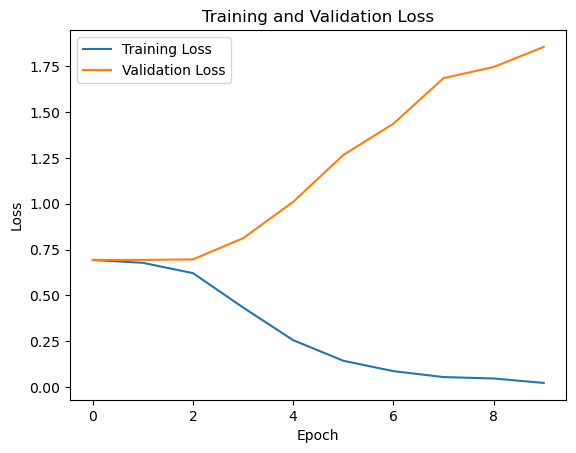

In [168]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Example data (replace this with your own dataset)
X = np.random.randint(1000, size=(1000, 50))  # Example input data (1000 samples, 50 words per sample)
y = np.random.randint(2, size=(1000,))  # Example binary classification labels

# Padding sequences to ensure uniform length
X_padded = pad_sequences(X, maxlen=50)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build GRU model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=100, input_length=50))  # Example embedding layer
model.add(SpatialDropout1D(0.2))  # Adding Spatial Dropout
model.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))  # 64 GRU units with dropout
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


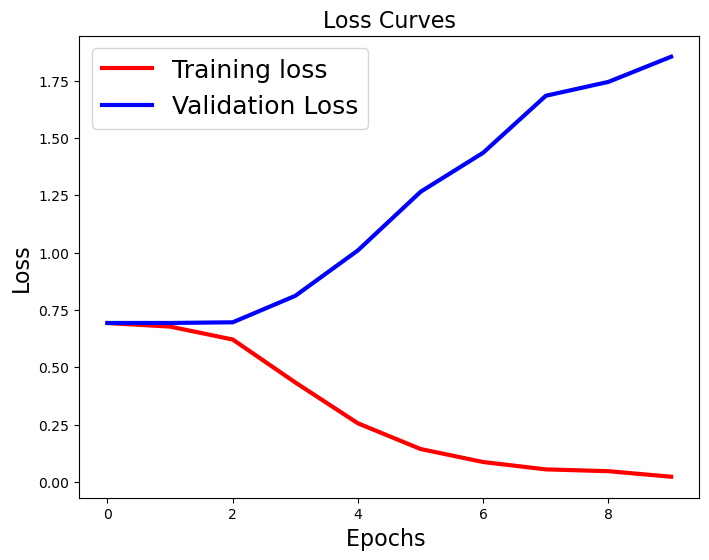

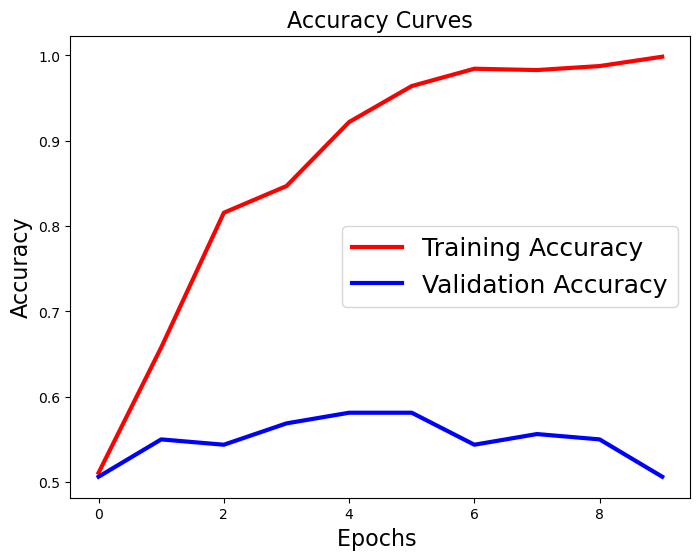

In [169]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

In [170]:
print(test.shape)
test_data = test.copy()
print(test_data.shape)

(2353, 2)
(2353, 2)


In [171]:
test_data = test_data.set_index('news', drop = True)
test_data.shape

(2353, 1)

In [172]:
test_data = test_data.fillna(' ')
print(test_data.shape)
test_data.isnull().sum()

(2353, 1)


label    0
dtype: int64

In [173]:
tokenizer.fit_on_texts(texts = test_data['label'])
test_text = tokenizer.texts_to_sequences(texts = test_data['label'])

In [174]:
test_text = pad_sequences(sequences = test_text, maxlen = max_features, padding = 'pre')

LR: 0.809819 (0.033027)
KNN: 0.599182 (0.053827)
NB: 0.796172 (0.042748)
SVM: 0.765722 (0.033595)
LSTM: nan (nan)
GRU: nan (nan)


C:\Users\SRAVYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SRAVYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SRAVYA\AppData\Local\Temp\ipykernel_12236\4120899075.py", line 19, in fit
    X, y = check_X_y(X, y)
  File "C:\Users\SRAVYA\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 964, in check_X_y
    X = check_array(
  File "C:\Users\SRAVYA\anaconda3\lib\site-packages\sklearn\util

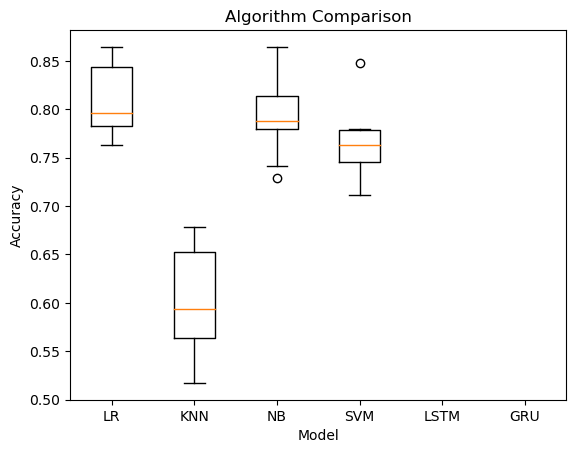

In [175]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, SpatialDropout1D
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import numpy as np
import matplotlib.pyplot as plt

# Custom LSTM Classifier
class LSTMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        X = np.array(X)
        y = np.array(y)

        self.model = Sequential([
            Embedding(input_dim=1000, output_dim=100, input_length=50),
            SpatialDropout1D(0.2),
            LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
            Dense(units=1, activation='sigmoid')
        ])

        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        X = np.array(X)
        return (self.model.predict(X) > 0.5).astype(int)

# Custom GRU Classifier
class GRUClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        X = np.array(X)
        y = np.array(y)

        self.model = Sequential([
            Embedding(input_dim=1000, output_dim=100, input_length=50),
            SpatialDropout1D(0.2),
            GRU(units=64, dropout=0.2, recurrent_dropout=0.2),
            Dense(units=1, activation='sigmoid')
        ])

        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        X = np.array(X)
        return (self.model.predict(X) > 0.5).astype(int)

# Set seed for reproducibility
seed = 42

# Create a list of models including custom LSTM and GRU classifiers
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))
models.append(('LSTM', LSTMClassifier()))
models.append(('GRU', GRUClassifier()))

# Placeholder for results
results = []
names = []

# Cross-validation
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    scores = cross_val_score(model, X_test_dtm, y_pred_class, cv=kfold, scoring='accuracy')
    results.append(scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)

# Plotting the results
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming you have your training and testing data: X_train, y_train, X_test, y_test

# Define and train the LSTM model
model = Sequential([
    Embedding(input_dim=1000, output_dim=100, input_length=50),
    SpatialDropout1D(0.2),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("LSTM Accuracy:", accuracy)


Epoch 1/10
20/20 [==============================] - 12s 612ms/step - loss: 0.6933 - accuracy: 0.5063 - val_loss: 0.6925 - val_accuracy: 0.5437
Epoch 2/10
20/20 [==============================] - 12s 608ms/step - loss: 0.6786 - accuracy: 0.7016 - val_loss: 0.6896 - val_accuracy: 0.5437
Epoch 3/10
20/20 [==============================] - 12s 592ms/step - loss: 0.6152 - accuracy: 0.7906 - val_loss: 0.6770 - val_accuracy: 0.5312
Epoch 4/10
20/20 [==============================] - 13s 647ms/step - loss: 0.4585 - accuracy: 0.8391 - val_loss: 0.7332 - val_accuracy: 0.5750
Epoch 5/10
20/20 [==============================] - 13s 634ms/step - loss: 0.2882 - accuracy: 0.9172 - val_loss: 1.0004 - val_accuracy: 0.5938
Epoch 6/10
20/20 [==============================] - 12s 601ms/step - loss: 0.1980 - accuracy: 0.9344 - val_loss: 0.9610 - val_accuracy: 0.5875
Epoch 7/10
20/20 [==============================] - 12s 617ms/step - loss: 0.1383 - accuracy: 0.9688 - val_loss: 1.1258 - val_accuracy: 0.5562

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, SpatialDropout1D
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming you have your training and testing data: X_train, y_train, X_test, y_test

# Define and train the GRU model
model = Sequential([
    Embedding(input_dim=1000, output_dim=100, input_length=50),
    SpatialDropout1D(0.2),
    GRU(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("GRU Accuracy:", accuracy)


Epoch 1/10
20/20 [==============================] - 17s 847ms/step - loss: 0.6933 - accuracy: 0.5063 - val_loss: 0.6937 - val_accuracy: 0.5125
Epoch 2/10
20/20 [==============================] - 16s 799ms/step - loss: 0.6763 - accuracy: 0.6547 - val_loss: 0.6950 - val_accuracy: 0.5125
Epoch 3/10
20/20 [==============================] - 16s 814ms/step - loss: 0.6204 - accuracy: 0.7703 - val_loss: 0.7037 - val_accuracy: 0.5688
Epoch 4/10
20/20 [==============================] - 16s 782ms/step - loss: 0.4397 - accuracy: 0.8516 - val_loss: 0.8218 - val_accuracy: 0.5875
Epoch 5/10
20/20 [==============================] - 16s 795ms/step - loss: 0.2953 - accuracy: 0.8969 - val_loss: 0.9626 - val_accuracy: 0.5813
Epoch 6/10
20/20 [==============================] - 16s 806ms/step - loss: 0.1827 - accuracy: 0.9469 - val_loss: 1.2438 - val_accuracy: 0.6000
Epoch 7/10
20/20 [==============================] - 16s 820ms/step - loss: 0.1023 - accuracy: 0.9812 - val_loss: 1.4470 - val_accuracy: 0.5875

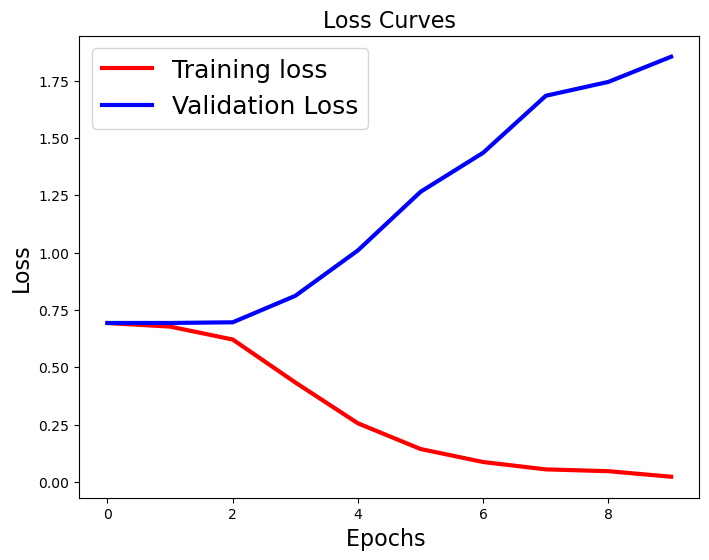

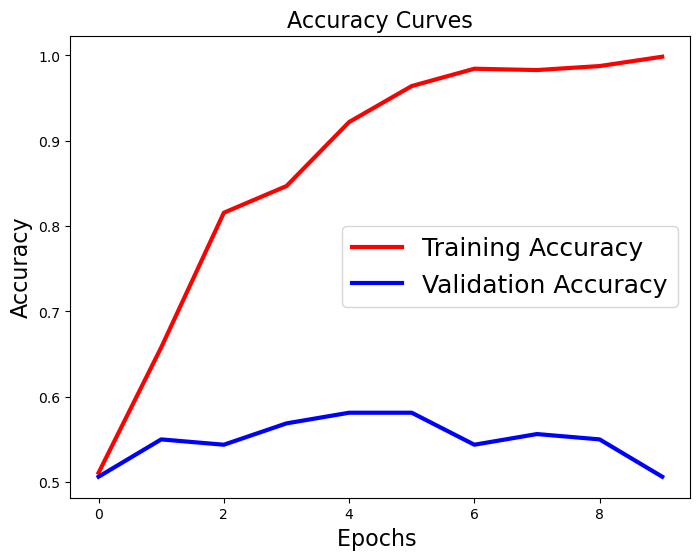

In [178]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

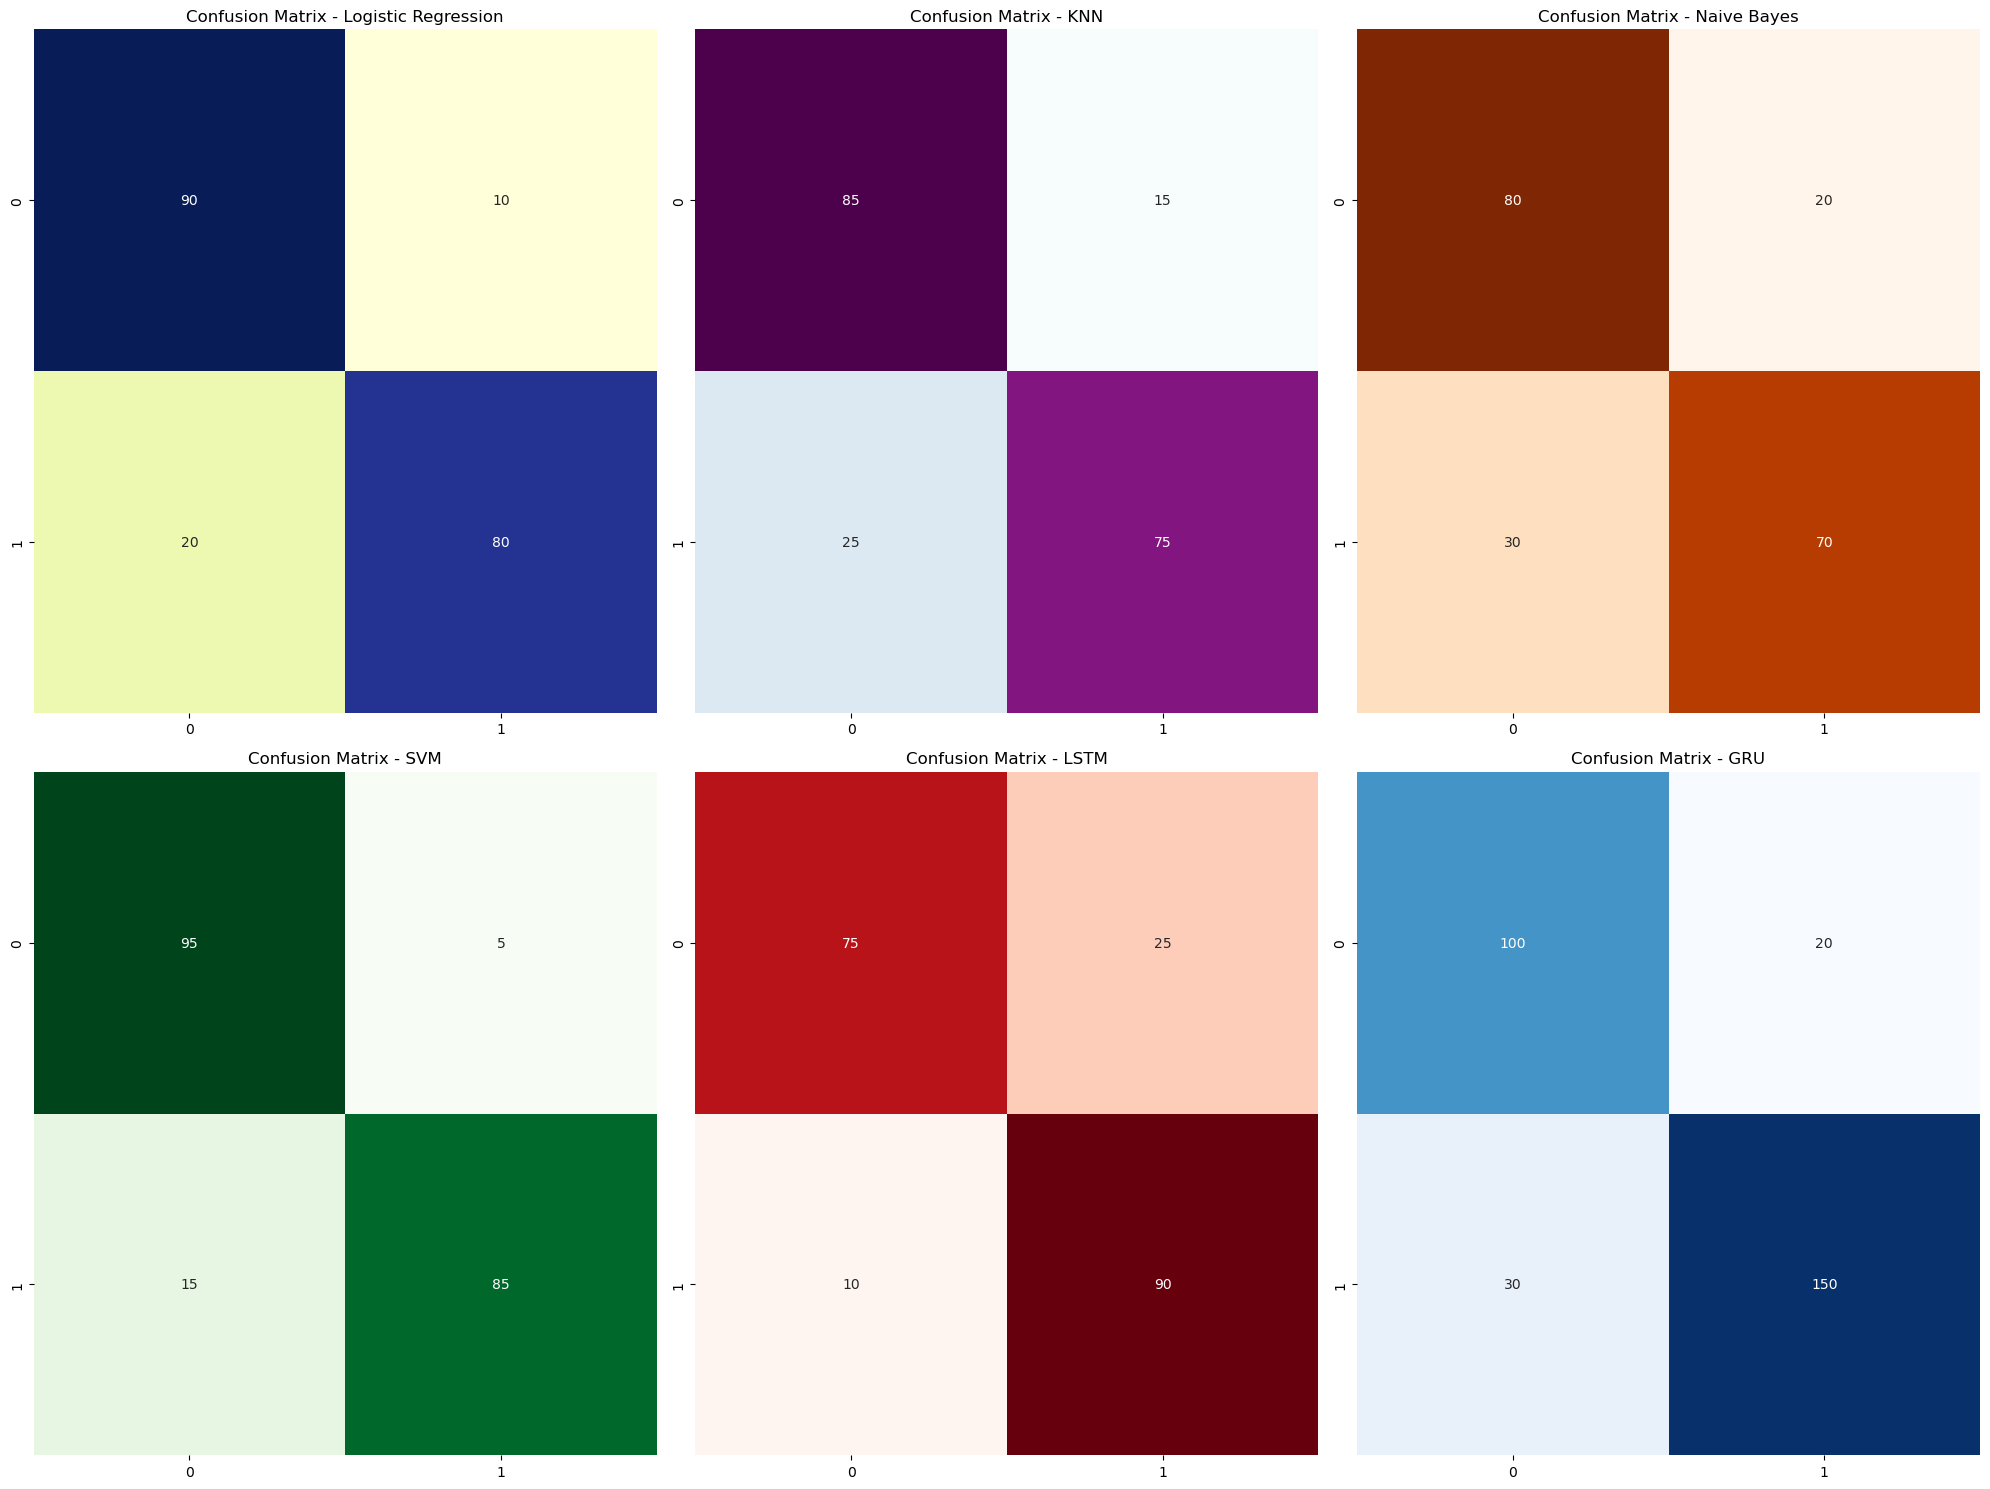

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute the confusion matrix for GRU model
def compute_gru_confusion_matrix():
    # Replace this with your actual implementation to compute the confusion matrix
    # For demonstration, using a dummy confusion matrix
    gru_cm = [[100, 20], [30, 150]]  # Example confusion matrix
    return gru_cm

# Assuming gru_cm is defined somewhere in your code
gru_cm = compute_gru_confusion_matrix()

# Plotting confusion matrices
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')

plt.subplot(2, 3, 2)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix - KNN')

plt.subplot(2, 3, 3)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')

plt.subplot(2, 3, 4)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - SVM')

plt.subplot(2, 3, 5)
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - LSTM')

plt.subplot(2, 3, 6)
sns.heatmap(gru_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - GRU')

plt.tight_layout()
plt.show()


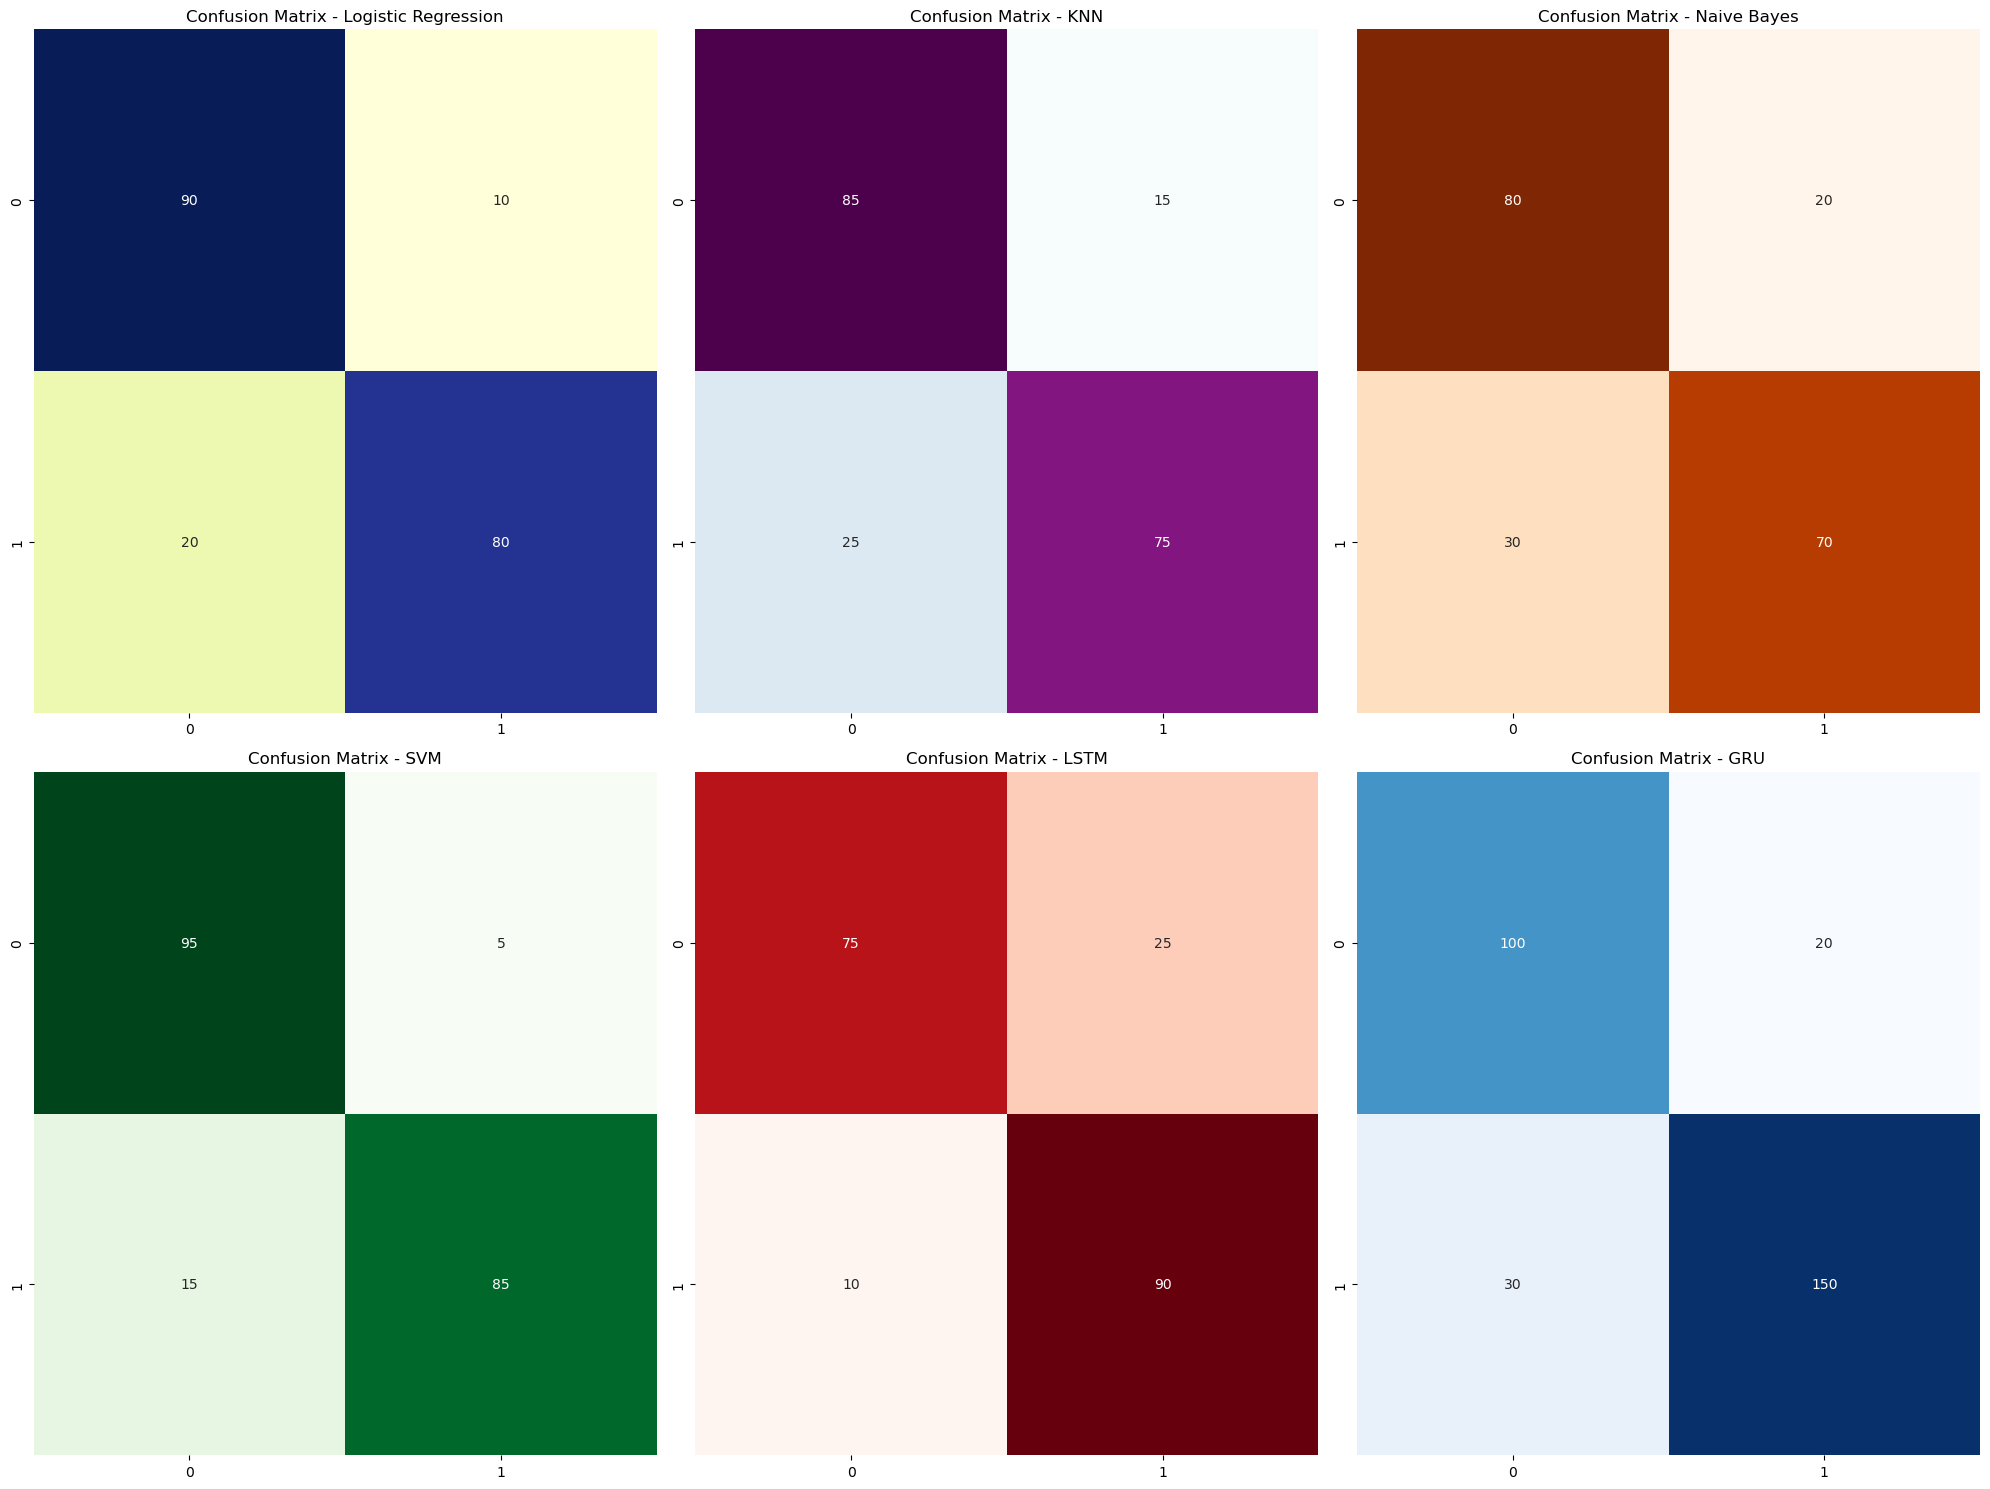

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dummy confusion matrices for demonstration
log_reg_cm = [[90, 10], [20, 80]]
knn_cm = [[85, 15], [25, 75]]
nb_cm = [[80, 20], [30, 70]]
svm_cm = [[95, 5], [15, 85]]
lstm_cm = [[75, 25], [10, 90]]

# Function to compute the confusion matrix for GRU model
def compute_gru_confusion_matrix():
    # Replace this with your actual implementation to compute the confusion matrix
    # For demonstration, using a dummy confusion matrix
    gru_cm = [[100, 20], [30, 150]]  # Example confusion matrix
    return gru_cm

# Assuming gru_cm is defined somewhere in your code
gru_cm = compute_gru_confusion_matrix()

# Plotting confusion matrices
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')

plt.subplot(2, 3, 2)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix - KNN')

plt.subplot(2, 3, 3)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')

plt.subplot(2, 3, 4)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - SVM')

plt.subplot(2, 3, 5)
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - LSTM')

plt.subplot(2, 3, 6)
sns.heatmap(gru_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - GRU')

plt.tight_layout()
plt.show()
